In [ ]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_eenters  = 
from DB_lister import list_eontent, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [6]:
from Enum.EnergyRange import EnergyRange
from Enum.Flavour import Flavour

In [98]:
def draw_ternary_grid(ax, ticks=[0.20, 0.4, 0.6, 0.8], h = np.sqrt(3) / 2, linewidth=1.0):
    """Draws a ternary grid with given tick spacing"""
    for t in ticks:
        # f_e grid
        ax.plot([t/2, 1 - t/2], [t*h, t*h], linestyle ='--', linewidth=linewidth, color=getColour(0))
        # f_mu grid
        ax.plot([(1 - t) / 2, 1 - t], [(1 - t) * h, 0], linestyle ='--', linewidth=linewidth, color=getColour(1))
        # f_tau grid
        ax.plot([t, (1 + t) / 2], [0, (1 - t) * h], linestyle ='--', linewidth=linewidth, color=getColour(2))

In [99]:
def convert_ternary_coords(f_e, f_mu, h = np.sqrt(3) / 2):
    x = f_e + f_mu / 2
    y = f_mu * h
    return x, y

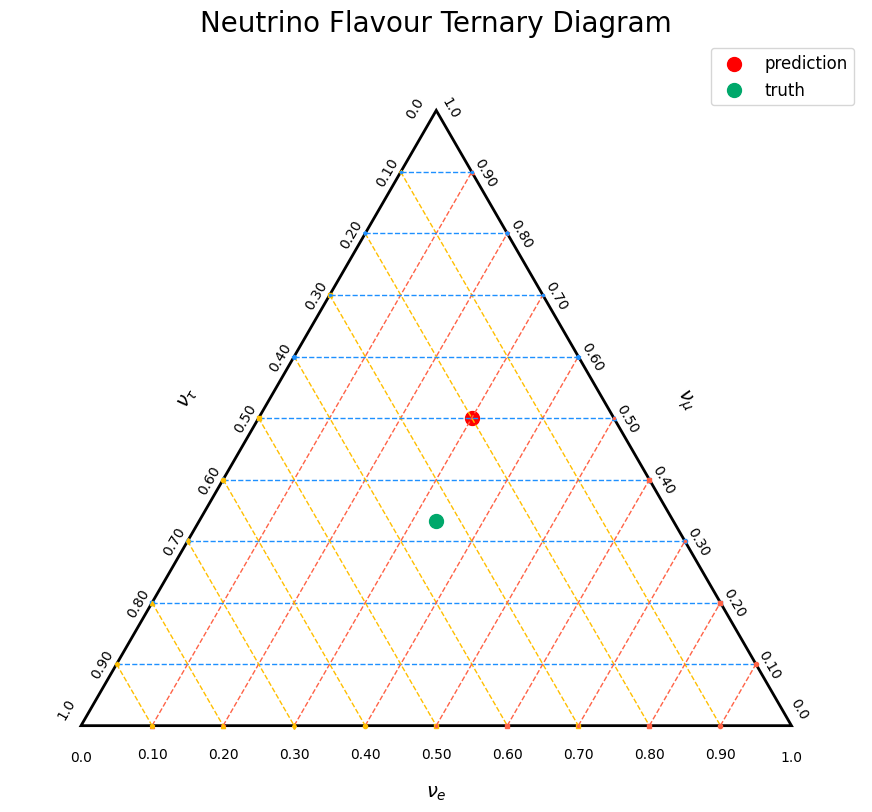

In [100]:
def abres_los_ojos(f_e, f_mu, f_tau, h=np.sqrt(3) / 2):
    if not np.isclose(f_e + f_mu + f_tau, 1.0):
        norm = f_e + f_mu + f_tau
        f_e = f_e / norm
        f_mu = f_mu / norm
        f_tau = f_tau / norm
    
    # Triangle vertices
    vertices = np.array([[0, 0], [1, 0], [0.5, h]])  # (f_e, f_mu, f_tau)
    
    # Convert (f_e, f_mu, f_tau) to (x, y)
    x, y = convert_ternary_coords(f_e, f_mu, h)
    x_truth, xy_truth = convert_ternary_coords(1/3, 1/3, h)


    fig, ax = plt.subplots(figsize=(11, 11))

    # Draw triangle
    triangle = plt.Polygon(vertices, edgecolor='black', fill=None, linewidth=2)
    ax.add_patch(triangle)

    # Draw ternary grid
    tick_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    draw_ternary_grid(ax, ticks=tick_values, h=h)

    # Plot the point
    ax.scatter(x, y, marker = 'o', label=f"prediction", s = 100, color = 'red')
    ax.scatter(x_truth, xy_truth, marker = 'o', label=f"truth", s = 100, color = getColour(3))

    # Formatting
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, np.sqrt(3)/2 + 0.1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Axis labels
    ax.text(0.5, -0.1, fr"${Flavour.E.latex}$", fontsize=14, ha='center')
    ax.text(0.0, -0.05, "0.0", fontsize=10, ha='center')  # 0.0 e
    ax.text(1.0, -0.05, "1.0", fontsize=10, ha='center')  # 1.0 e
    
    ax.text(0.85, 0.45, fr"${Flavour.MU.latex}$", fontsize=14, rotation=-60, ha='center')
    ax.text(1.01, 0.01, "0.0", fontsize=10, ha='center', rotation=300)  # 0.0 mu
    ax.text(0.52, h-0.01, "1.0", fontsize=10, ha='center', rotation=300) # 1.0 mu
    
    ax.text(0.15, 0.45, fr"${Flavour.TAU.latex}$", fontsize=14, rotation=60, ha='center')
    ax.text(0.47, h-0.01, "0.0", fontsize=10, ha='center', rotation=60)  # 0.0 tau
    ax.text(-0.02, 0.01, "1.0", fontsize=10, ha='center', rotation=60)  # 1.0 tau

    for t in tick_values:
        ax.text(t, -0.03, f"{t:.2f}", fontsize=10, ha='center', va='top') # f_e axis (bottom)
        ax.text(1 - (t / 2), (t * h), f"{t:.2f}", fontsize=10, rotation=-60, ha='left', va='center') # f_mu axis
        ax.text((1 - t)/2, ((1 - t) * h), f"{t:.2f}", fontsize=10, rotation=60, ha='right', va='center') # f_tau axis

    ax.legend()
    ax.set_title(f"Neutrino Flavour Ternary Diagram")
    ax.set_frame_on(False)
    plt.show()

# Example usage:
abres_los_ojos(0.3, 0.5, 0.2)